# Import DES images

In [5]:
import numpy as np
from rf_meta_query import des, images
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from pyvo.dal import sia
from astropy.io import fits
from astropy.wcs import WCS

## Download image

In [2]:
a = SkyCoord(326.105208333333, -40.900225,unit="deg")
img_g = des.download_deepest_image(a,0.1*u.arcmin,band="r")

## Image format
Fits hdu object. Contains metadata too 

In [3]:
help(img_g)

Help on PrimaryHDU in module astropy.io.fits.hdu.image object:

class PrimaryHDU(_ImageBaseHDU)
 |  FITS primary HDU class.
 |  
 |  Method resolution order:
 |      PrimaryHDU
 |      _ImageBaseHDU
 |      astropy.io.fits.hdu.base._ValidHDU
 |      astropy.io.fits.hdu.base._BaseHDU
 |      astropy.io.fits.verify._Verify
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, header=None, do_not_scale_image_data=False, ignore_blank=False, uint=True, scale_back=None)
 |      Construct a primary HDU.
 |      
 |      Parameters
 |      ----------
 |      data : array or DELAYED, optional
 |          The data in the HDU.
 |      
 |      header : Header instance, optional
 |          The header to be used (as a template).  If ``header`` is `None`, a
 |          minimal header will be provided.
 |      
 |      do_not_scale_image_data : bool, optional
 |          If `True`, image data is not scaled using BSCALE/BZERO values
 |          when read. (default:

In [13]:
(-41.0392229707934--40.3087761669635)*3600

-2629.608493787663

In [4]:
img_g.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   24 / length of data axis 1                          
NAXIS2  =                   23 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CHECKSUM= '3iB65ZA63fA63ZA6'   / HDU checksum updated 2016-10-13T15:01:15       
DATASUM = '         0'         / data unit checksum updated 2016-10-13T15:01:15 
EXTNAME = 'SCI     '                                                            
EQUINOX =                2000. / Mean equinox                                   
MJD-OBS =       56951.133857

## Plot

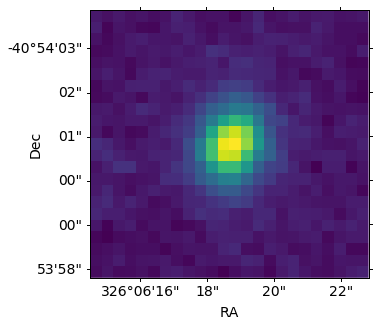

In [5]:
plt.rcParams['font.size']=14
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111,projection=WCS(img_g.header))
ax.imshow(img_g.data)
ax.set_ylabel("Dec",labelpad=-2)
ax.set_xlabel("RA")
plt.show()

## Plot with `image.gen_snapshot_plt`

<module 'matplotlib.pyplot' from '/home/sunil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

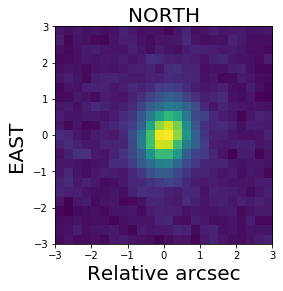

In [14]:
img = images.gen_snapshot_plt(img_g.data,6)
img

## Get catalog

In [4]:
cat = des.get_catalog(a)
cat

Returning Pandas dataframe


coadd_object_id,ra,dec,tilename,mag_auto_g,mag_auto_r,mag_auto_i,mag_auto_z,mag_auto_y,magerr_auto_g,magerr_auto_r,magerr_auto_i,magerr_auto_z,magerr_auto_y
int64,float64,float64,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
209914643,326.086041,-40.901552,DES2143-4040,23.4549,23.2898,23.5863,22.7827,22.345,0.116219,0.156908,0.354608,0.2386,0.469674
209915148,326.088667,-40.910918,DES2143-4040,20.8881,19.8578,19.4975,19.2038,19.2112,0.0162782,0.00986435,0.012119,0.0130019,0.0385481
209915482,326.094226,-40.914568,DES2143-4040,24.3219,23.6833,23.0742,23.4189,23.6162,0.220573,0.192296,0.189141,0.366194,1.29496
209915423,326.092738,-40.913558,DES2143-4040,25.1862,24.3553,24.4024,24.0118,24.2002,0.269099,0.19639,0.353377,0.347946,1.2208299999999999
209915232,326.09459300000003,-40.911518,DES2143-4040,22.4097,20.7672,19.4068,18.8828,18.7325,0.0446741,0.0155311,0.00768525,0.00663928,0.0169963
209915124,326.090892,-40.908958,DES2143-4040,23.6307,23.0395,22.3684,22.4142,24.3201,0.16914,0.15398599999999998,0.143069,0.21034499999999998,3.59188
209914995,326.091842,-40.906978,DES2143-4040,23.5452,22.0613,21.3243,21.0858,20.9976,0.100502,0.0403523,0.03521269999999999,0.0397477,0.108047
209914212,326.089362,-40.902784999999994,DES2143-4040,15.2685,17.9655,17.7888,14.9128,14.5446,0.000266574,0.00292812,0.00368371,0.00040444,0.0007876239999999999
209914668,326.092177,-40.902916999999995,DES2143-4040,21.8587,21.2185,20.9088,20.5513,20.1947,0.034326499999999996,0.0297534,0.0385954,0.0389719,0.082609
